# Farfetch DS Exercise
## March 2nd, 2017
### Dr Jose M Albornoz

# Import necessary modules

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples
from sklearn import metrics
from sklearn.datasets import make_blobs

RANDOM_STATE = 801

# 1 Detecting a marketing promotion

## 1.1 Load data

In [4]:
marketing_0 = pd.read_csv('marketing_promo.csv')

In [5]:
marketing_0.head()

,Day,visits,orders
0,1,3316,17
1,2,3654,23
2,3,3437,14
3,4,3368,5
4,5,3588,16


In [6]:
marketing_0.shape

(122, 3)

The data represents web site visits and orders during a period of 122 days

## 1.2 Plot data

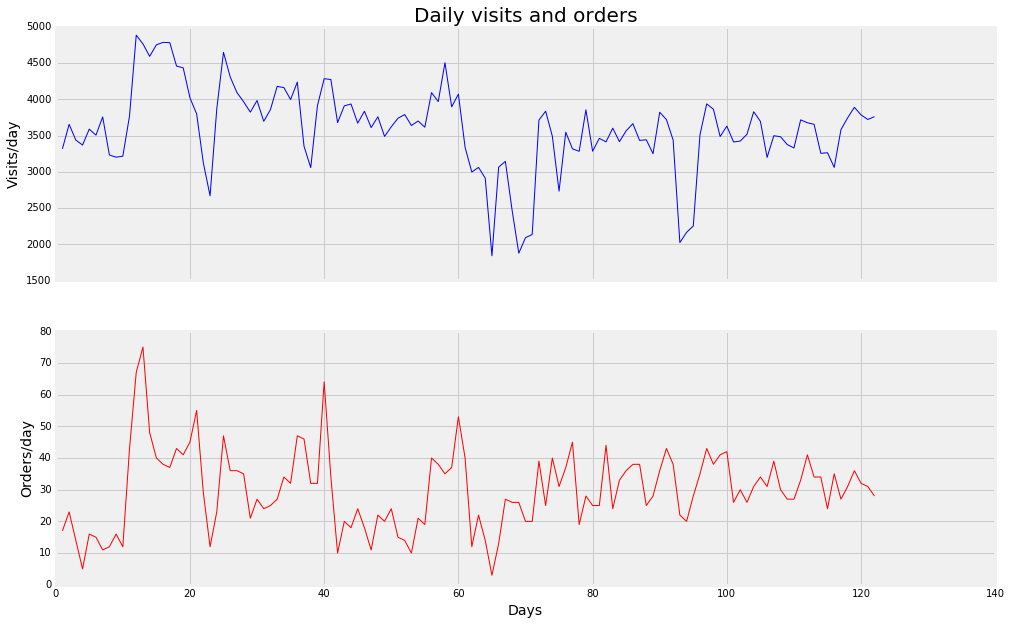

In [7]:
f, axarr = plt.subplots(2, sharex=True, figsize=(15,10), dpi=100)

axarr[0].plot(marketing_0.Day, marketing_0.visits, color="blue", linewidth=1.0, linestyle="-")
axarr[0].set_title('Daily visits and orders', fontsize=20)
axarr[0].set_ylabel('Visits/day', fontsize=14)

axarr[1].plot(marketing_0.Day, marketing_0.orders, color="red", linewidth=1.0, linestyle="-")
axarr[1].set_ylabel('Orders/day', fontsize=14)
axarr[1].set_xlabel('Days', fontsize=14)

## 1.3 Normalisation

In [8]:
marketing_0['visits_normalised'] = (marketing_0['visits'] - marketing_0['visits'].mean())/marketing_0['visits'].std() 

In [9]:
marketing_0['orders_normalised'] = (marketing_0['orders'] - marketing_0['orders'].mean() )/marketing_0['orders'].std()

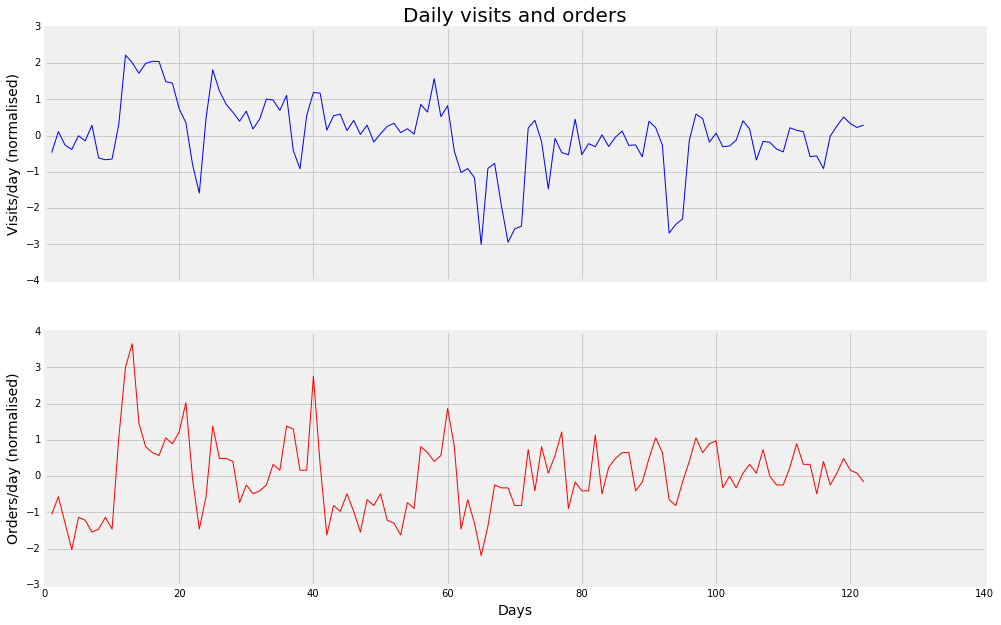

In [10]:
f, axarr = plt.subplots(2, sharex=True, figsize=(15,10), dpi=100)

axarr[0].plot(marketing_0.Day, marketing_0.visits_normalised, color="blue", linewidth=1.0, linestyle="-")
axarr[0].set_title('Daily visits and orders', fontsize=20)
axarr[0].set_ylabel('Visits/day (normalised)', fontsize=14)

axarr[1].plot(marketing_0.Day, marketing_0.orders_normalised, color="red", linewidth=1.0, linestyle="-")
axarr[1].set_ylabel('Orders/day (normalised)', fontsize=14)
axarr[1].set_xlabel('Days', fontsize=14)

## 1.4 Differentiating

In [11]:
X = marketing_0['visits_normalised'].values
diff = [0]
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

marketing_0['visits_normalised_difference'] = diff

In [12]:
X = marketing_0['orders_normalised'].values
diff = [0]
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

marketing_0['orders_normalised_difference'] = diff

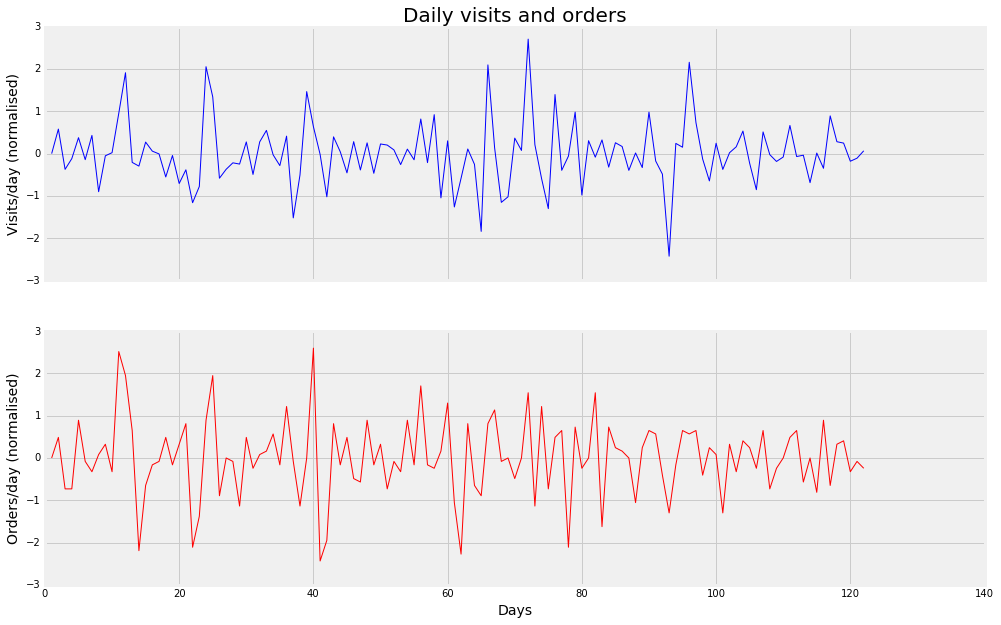

In [13]:
f, axarr = plt.subplots(2, sharex=True, figsize=(15,10), dpi=100)

axarr[0].plot(marketing_0.Day, marketing_0.visits_normalised_difference, color="blue", linewidth=1.0, linestyle="-")
axarr[0].set_title('Daily visits and orders', fontsize=20)
axarr[0].set_ylabel('Visits/day (normalised)', fontsize=14)

axarr[1].plot(marketing_0.Day, marketing_0.orders_normalised_difference, color="red", linewidth=1.0, linestyle="-")
axarr[1].set_ylabel('Orders/day (normalised)', fontsize=14)
axarr[1].set_xlabel('Days', fontsize=14)

## 1.5 Orders per visit

In [18]:
marketing_0['orders_per_visit'] = marketing_0['orders_normalised_difference']*0.05/marketing_0['visits_normalised_difference']

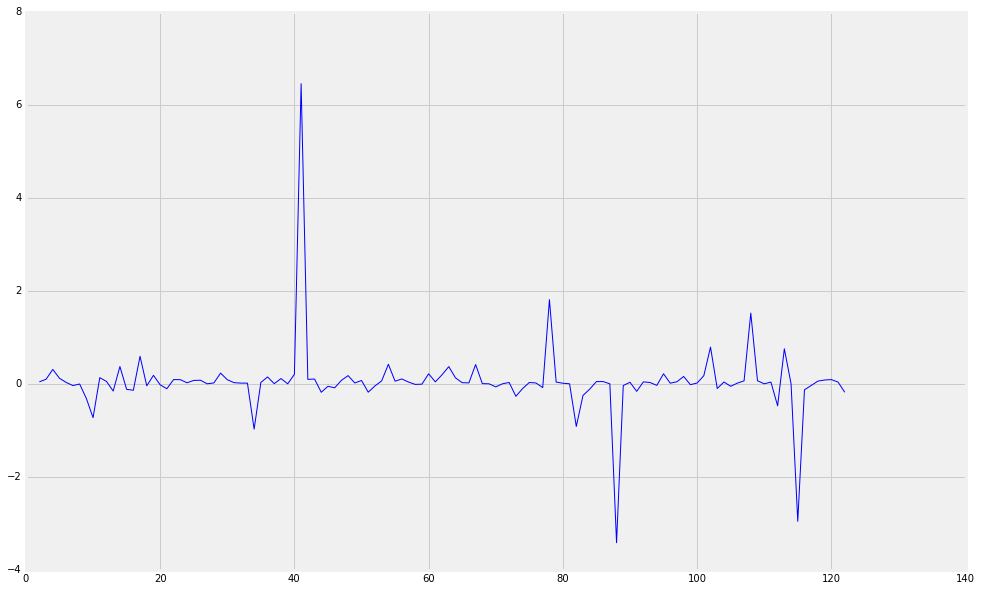

In [19]:
fig = plt.figure(figsize=(15,10))

plt.plot(marketing_0.Day, marketing_0['orders_per_visit'], color="blue", linewidth=1.0, linestyle="-")

# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)


## 1.5 Doing it other way

In [52]:
marketing_1 = marketing_0.copy()

In [53]:
marketing_1.head()

,Day,visits,orders,visits_normalised,orders_normalised,visits_normalised_difference,orders_normalised_difference,orders_per_visit,orders_per_visit_difference
0,1,3316,17,-0.473380,-1.056455,0.000000,0.000000,NaN,0.000000
1,2,3654,23,0.106718,-0.569168,0.580098,-7.565104,0.840008,-7.565104
2,3,3437,14,-0.265712,-1.300099,-0.372430,10.226266,1.962600,10.226266
3,4,3368,5,-0.384134,-2.031030,-0.118422,0.394402,6.172235,0.394402
4,5,3588,16,-0.006556,-1.137670,0.377579,168.254951,2.366024,168.254951


In [54]:
marketing_1['orders_per_visit'] = marketing_1['orders_normalised']/marketing_1['visits_normalised']

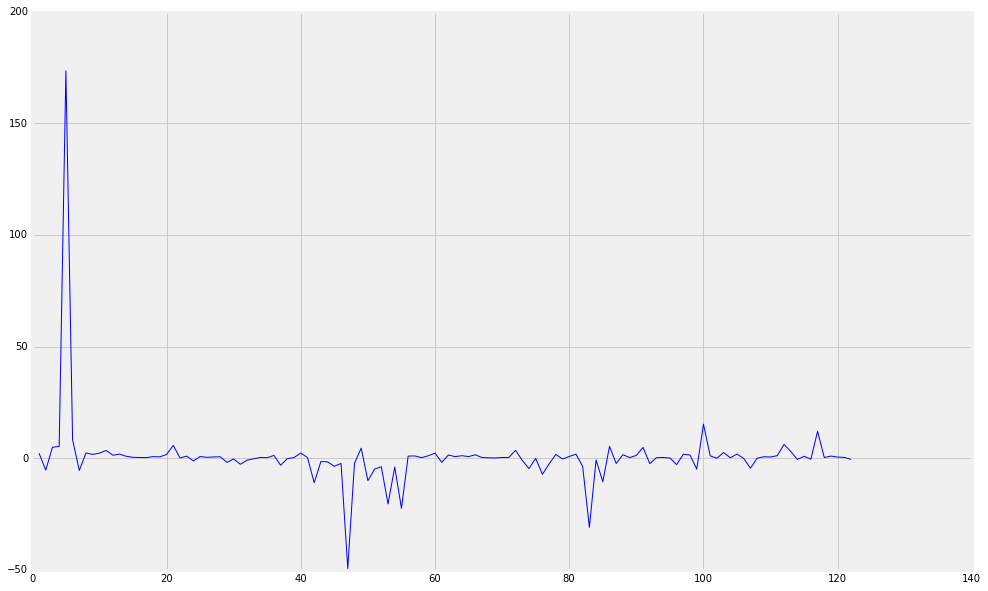

In [55]:
fig = plt.figure(figsize=(15,10))

plt.plot(marketing_1.Day, marketing_1['orders_per_visit'], color="blue", linewidth=1.0, linestyle="-")

# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

In [57]:
X = marketing_1['orders_per_visit'].values
diff = [0]
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

marketing_1['orders_per_visit_difference'] = diff

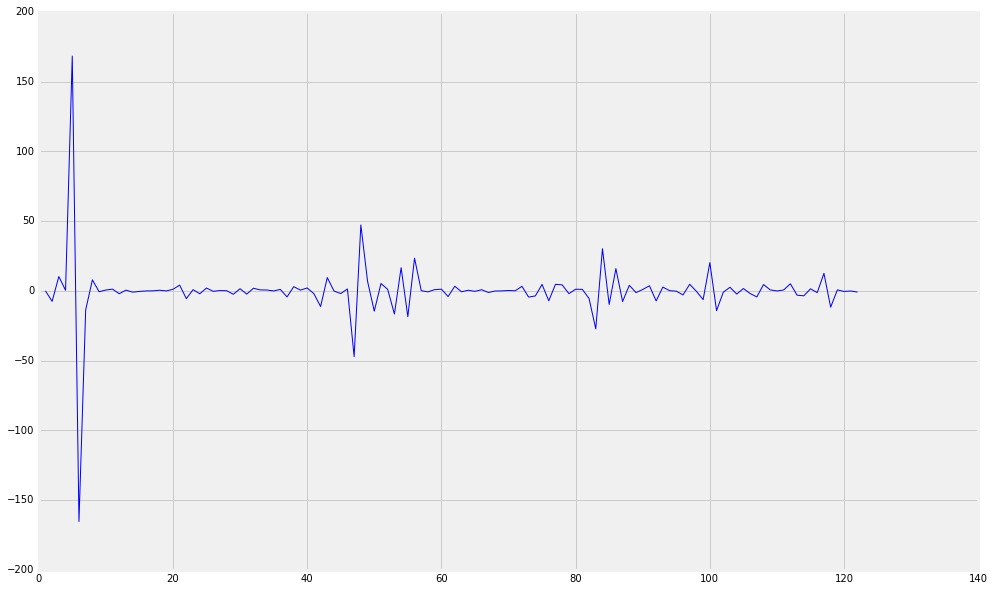

In [58]:
fig = plt.figure(figsize=(15,10))

plt.plot(marketing_1.Day, marketing_1['orders_per_visit_difference'], color="blue", linewidth=1.0, linestyle="-")

# Create a new figure of size 8x6 inches, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

Completed in 1 hour

# 2 Clustering

## 2.1 Load data

In [4]:
clustering_0 = pd.read_csv('clustering_data.csv', header=None)

In [5]:
clustering_0.columns = ['F1', 'F2', 'F3', 'F4', 'F5']

In [6]:
clustering_0.head()

,F1,F2,F3,F4,F5
0,9.867585,21.787221,20.113157,15.892429,19.180627
1,-9.357452,-15.005907,-10.498652,-8.608220,-7.057452
2,-15.704679,-17.867917,-13.475520,-16.897009,-13.443890
3,21.199188,22.555756,18.634152,20.666434,17.455580
4,112.268019,97.873333,68.139400,164.779071,91.519554


In [7]:
clustering_0.shape

(5300, 5)

## 2.2 Feature standardisation

In [8]:
scl = StandardScaler()    

In [9]:
clustering_1 = scl.fit_transform(clustering_0)

## 2.3 Exploratory 3D plots

<IPython.core.display.Javascript object>


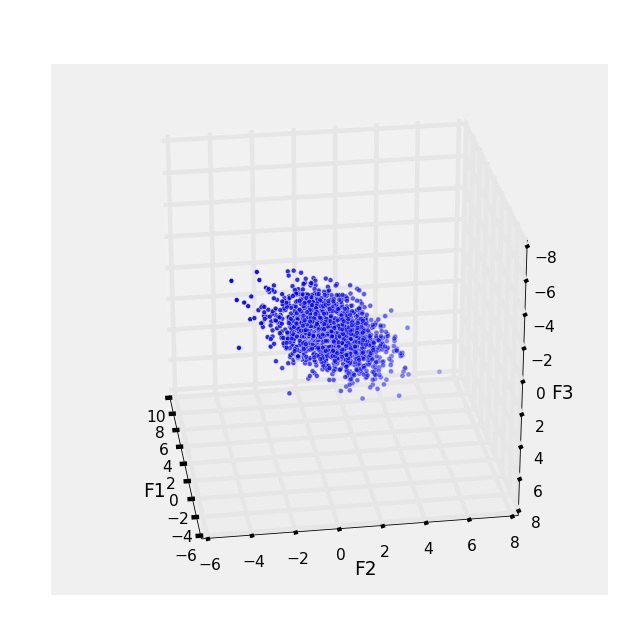

In [191]:
%matplotlib notebook
ax = fig.add_subplot(111, projection='3d')

threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1[:,0], clustering_1[:,1], clustering_1[:,2])
threedee.set_xlabel('F1')
threedee.set_ylabel('F2')
threedee.set_zlabel('F3')
plt.show()

<IPython.core.display.Javascript object>


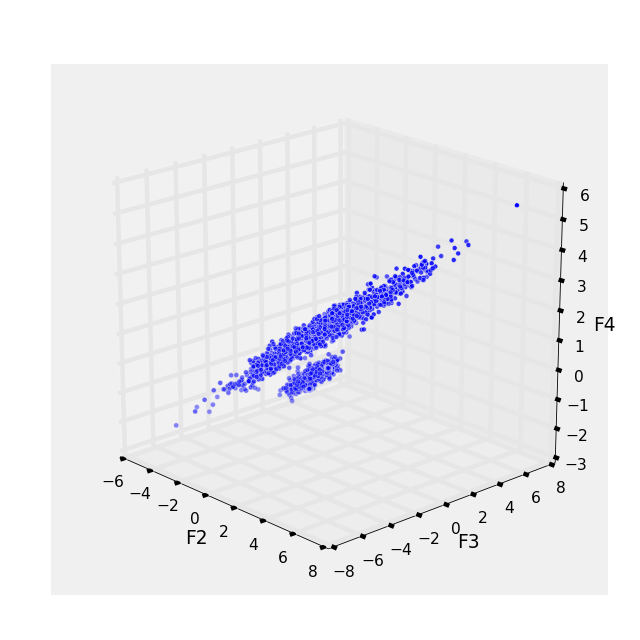

In [192]:
threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1[:,1], clustering_1[:,2], clustering_1[:,3])
threedee.set_xlabel('F2')
threedee.set_ylabel('F3')
threedee.set_zlabel('F4')
plt.show()

<IPython.core.display.Javascript object>


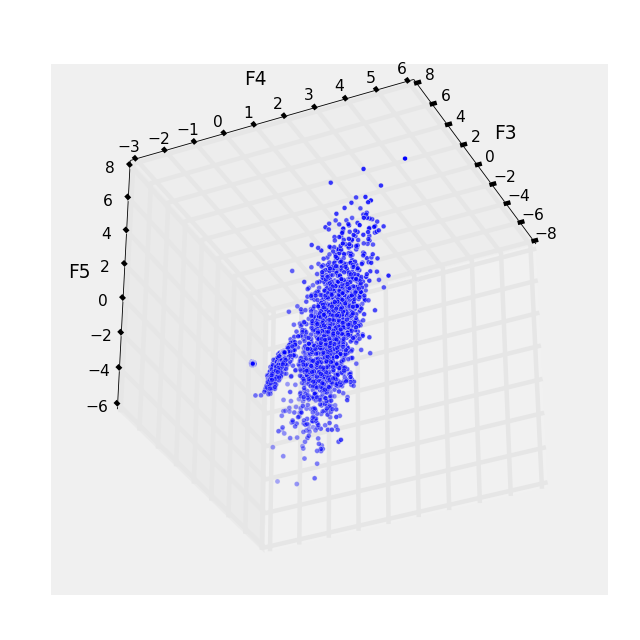

In [193]:
threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1[:,2], clustering_1[:,3], clustering_1[:,4])
threedee.set_xlabel('F3')
threedee.set_ylabel('F4')
threedee.set_zlabel('F5')
plt.show()

<IPython.core.display.Javascript object>


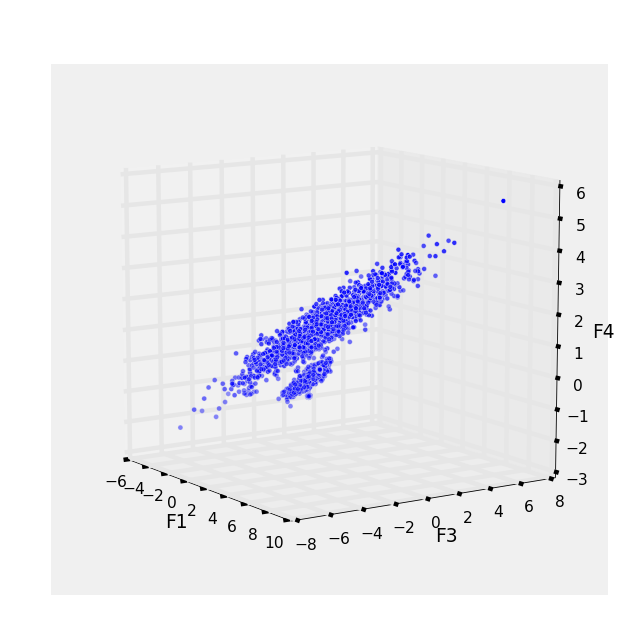

In [194]:
threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1[:,0], clustering_1[:,2], clustering_1[:,3])
threedee.set_xlabel('F1')
threedee.set_ylabel('F3')
threedee.set_zlabel('F4')
plt.show()

<IPython.core.display.Javascript object>


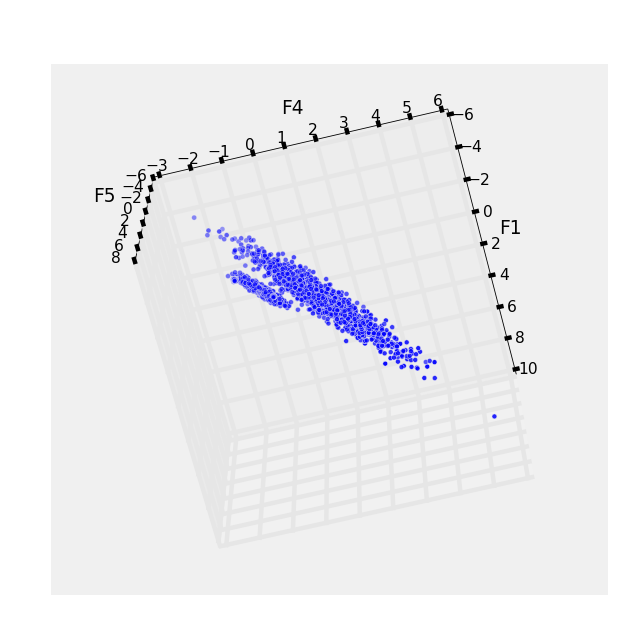

In [195]:
threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1[:,0], clustering_1[:,3], clustering_1[:,4])
threedee.set_xlabel('F1')
threedee.set_ylabel('F4')
threedee.set_zlabel('F5')
plt.show()

## 2.4 PCA

In [197]:
pca = PCA(n_components=None)

In [198]:
clustering_1_pca = pca.fit_transform(clustering_1)

In [199]:
pca.explained_variance_ratio_

array([ 0.7366454 ,  0.16452354,  0.07737197,  0.01595512,  0.00550396])

<IPython.core.display.Javascript object>


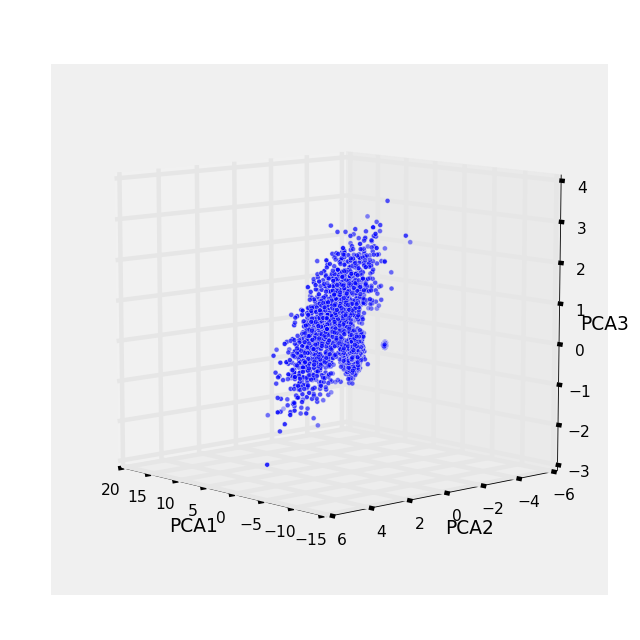

In [202]:
%matplotlib notebook
threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1_pca[:,0], clustering_1_pca[:,1], clustering_1_pca[:,2])
threedee.set_xlabel('PCA1')
threedee.set_ylabel('PCA2')
threedee.set_zlabel('PCA3')
plt.show()

## 2.5 k-means

In [256]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=RANDOM_STATE)

In [257]:
clusters_km = km.fit_predict(clustering_1)

In [258]:
km.inertia_

10056.390617032655

In [259]:
km.cluster_centers_

array([[ -1.04753158e+00,  -1.12285544e+00,  -4.66455200e-01,
         -8.41409371e-01,  -6.11362774e-01],
       [  1.91325948e+00,   1.84062673e+00,   1.49945405e+00,
          2.13190021e+00,   1.99944779e+00],
       [  1.41202880e-01,   1.90873416e-01,  -5.88478976e-02,
          1.54269886e-03,  -8.35545426e-02]])

In [260]:
centers = km.cluster_centers_

<IPython.core.display.Javascript object>


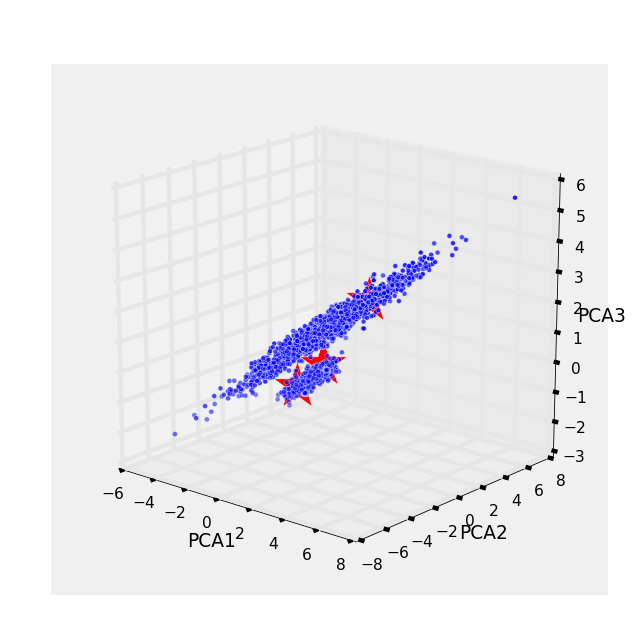

In [266]:
%matplotlib notebook
threedee = plt.figure(figsize=(8,8)).gca(projection='3d')
threedee.scatter(clustering_1[:,1], clustering_1[:,2], clustering_1[:,3])
threedee.set_xlabel('PCA1')
threedee.set_ylabel('PCA2')
threedee.set_zlabel('PCA3')
threedee.scatter(centers[0,1], centers[0,2], centers[0,3], c='red', s=2000, marker = '*')
threedee.scatter(centers[1,1], centers[1,2], centers[1,3], c='red', s=2000, marker = '*')
threedee.scatter(centers[2,1], centers[2,2], centers[2,3], c='red', s=2000, marker = '*')

plt.show()

### 2.5.1 Elbow curve for k-means

In [274]:
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=RANDOM_STATE)
    km.fit(clustering_1)
    distortions.append(km.inertia_)

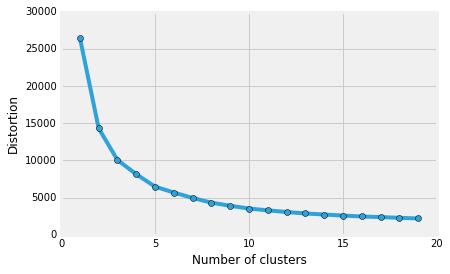

In [275]:
%matplotlib inline
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

### 2.5.2 Silhouette plots

In [25]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=RANDOM_STATE)
y_km = km.fit_predict(clustering_1)

In [26]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

In [27]:
silhouette_vals = silhouette_samples(clustering_1, y_km, metric='euclidean')

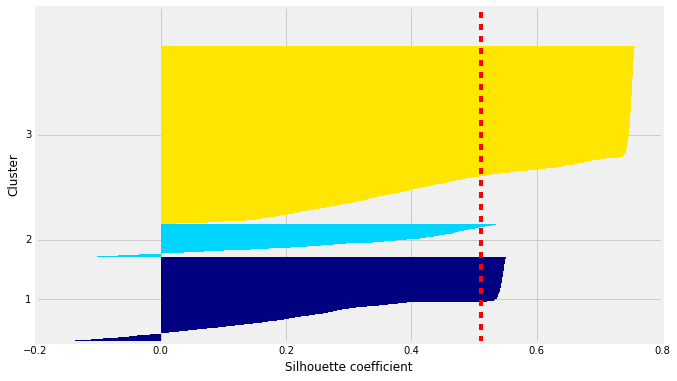

In [28]:
plt.figure(figsize=(10,6), dpi=80)
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

## 2.6 DBSCAN

In [424]:
db = DBSCAN(eps=0.2, min_samples=20, metric='euclidean')

In [425]:
db.fit(clustering_1)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    min_samples=20, n_jobs=1, p=None)

In [426]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [427]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [428]:
n_clusters_

2

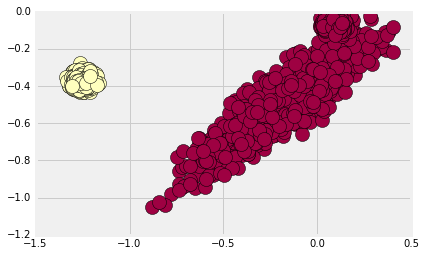

In [438]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = clustering_1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 4], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

## 2.7 Cluster generation

### 2.7.1 Original data

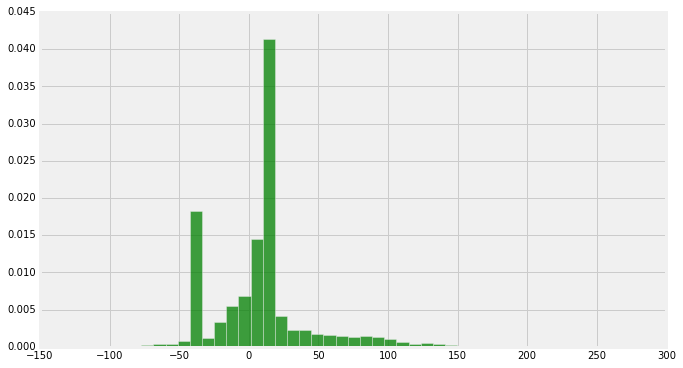

In [444]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_0['F1'], 50, normed=1, facecolor='green', alpha=0.75)

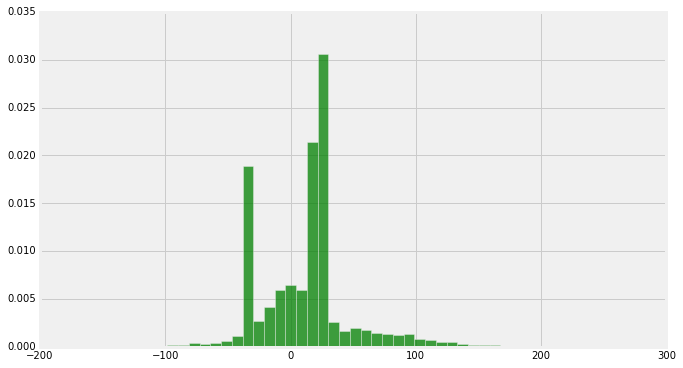

In [446]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_0['F2'], 50, normed=1, facecolor='green', alpha=0.750)

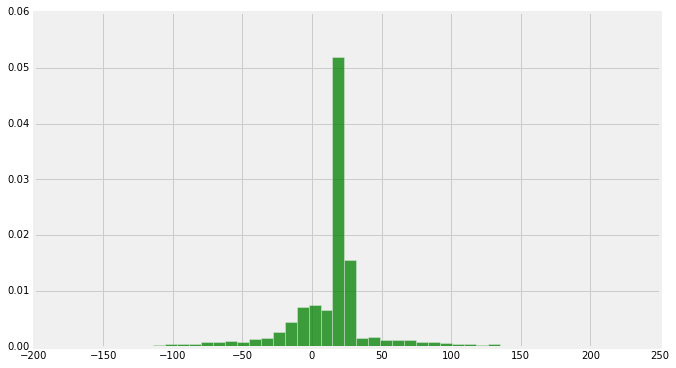

In [447]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_0['F3'], 50, normed=1, facecolor='green', alpha=0.750)

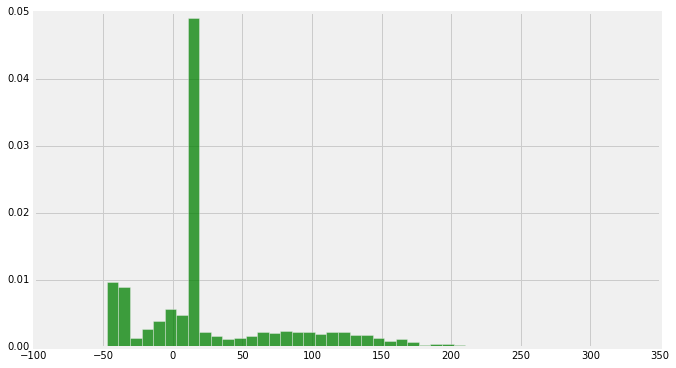

In [448]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_0['F4'], 50, normed=1, facecolor='green', alpha=0.750)

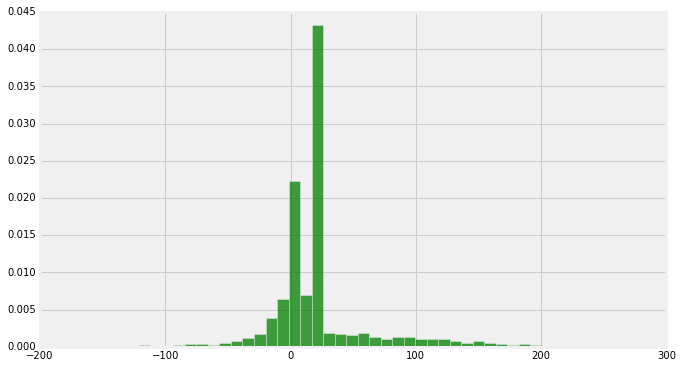

In [449]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_0['F5'], 50, normed=1, facecolor='green', alpha=0.750)

### 2.7.2 Standardised data

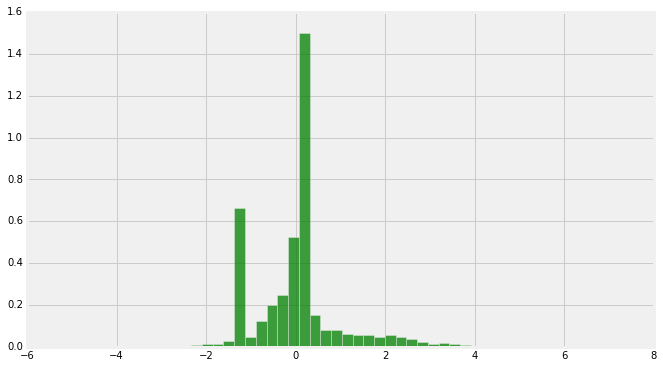

In [10]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_1[:,0], 50, normed=1, facecolor='green', alpha=0.75)

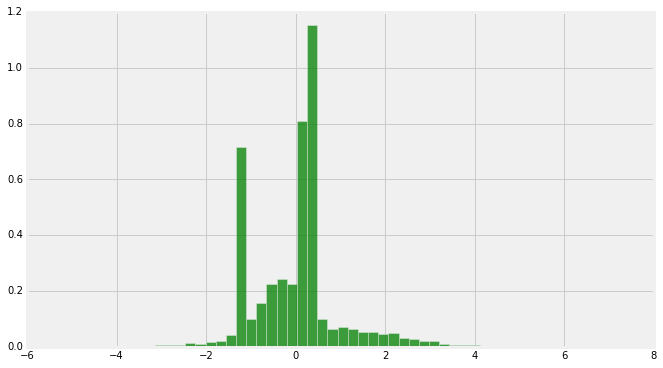

In [11]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_1[:,1], 50, normed=1, facecolor='green', alpha=0.750)

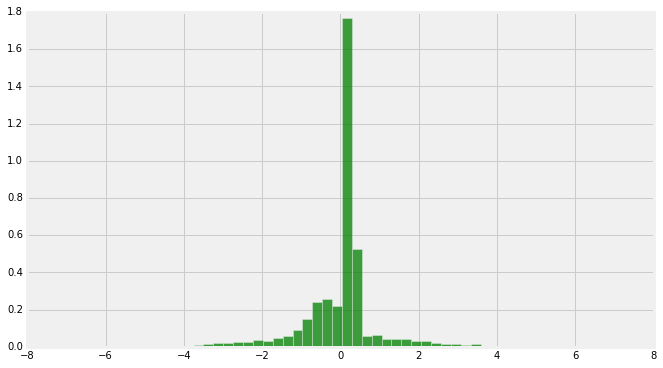

In [12]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_1[:,2], 50, normed=1, facecolor='green', alpha=0.750)

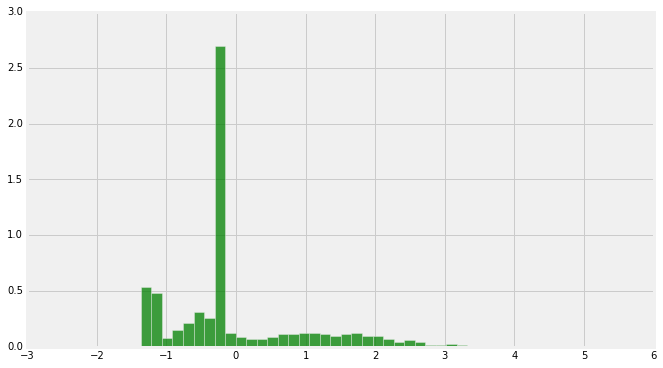

In [13]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_1[:,3], 50, normed=1, facecolor='green', alpha=0.750)

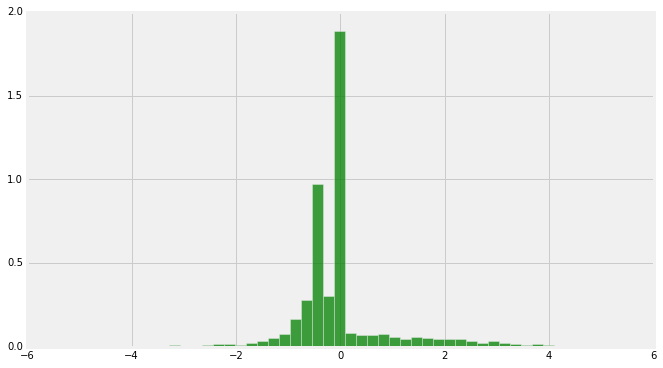

In [14]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(clustering_1[:,4], 50, normed=1, facecolor='green', alpha=0.750)

### 2.7.1 Cluster generation with make_blobs

In [2]:
X, y = make_blobs(n_samples=5300, n_features=5, centers=2, cluster_std=0.5, shuffle=True, random_state=RANDOM_STATE)

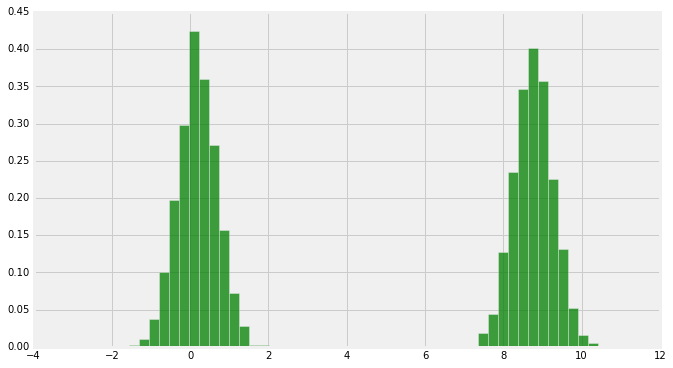

In [15]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(X[:,0], 50, normed=1, facecolor='green', alpha=0.75)

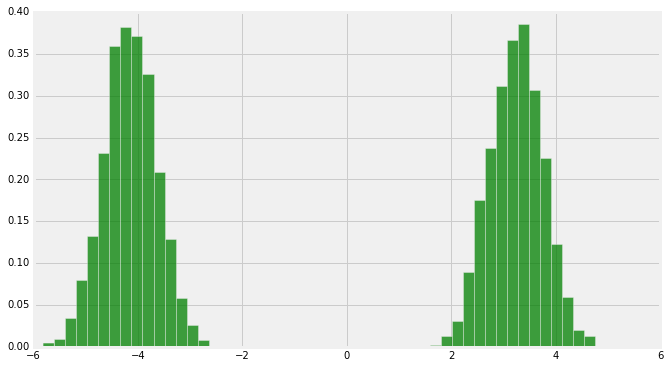

In [16]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(X[:,1], 50, normed=1, facecolor='green', alpha=0.750)

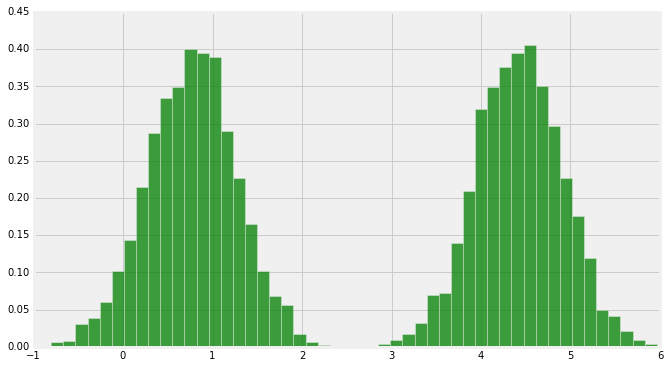

In [18]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(X[:,2], 50, normed=1, facecolor='green', alpha=0.750)

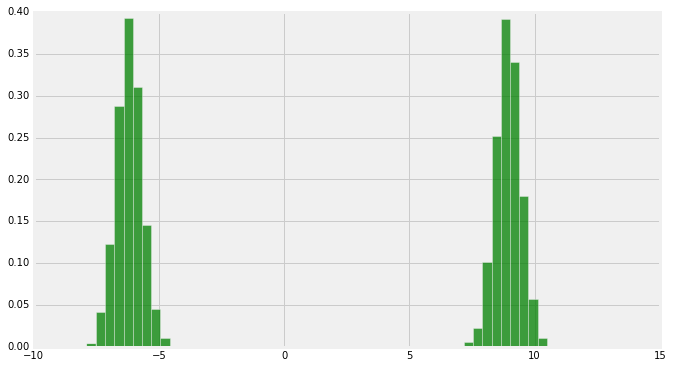

In [19]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(X[:,3], 50, normed=1, facecolor='green', alpha=0.750)

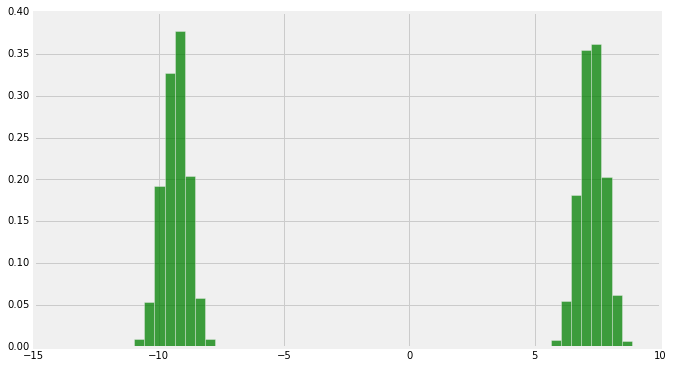

In [20]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(X[:,4], 50, normed=1, facecolor='green', alpha=0.750)